<a href="https://colab.research.google.com/github/sachinvarriar/ML-Tutorials/blob/main/titanic_modeling_with_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong><center style='font-size:40px;font-family:Georgia;'>Predict survival on the Titanic</center><strong>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


![](https://images.unsplash.com/photo-1614645169630-a3932d31ba92?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Nnx8VGl0YW5pY3xlbnwwfDB8MHx8&auto=format&fit=crop&w=800&q=60)

# 📖Read Data

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/titanic_data/train.csv')
test=pd.read_csv('/content/drive/MyDrive/titanic_data/test.csv')
print('Shape of Training Data:',train.shape,'Shape of Testing Data',test.shape)

Shape of Training Data: (891, 12) Shape of Testing Data (418, 11)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 🧹Data Cleaning

# 1️⃣Drop useless columns

In [ ]:
train1=train.copy()
test1=test.copy()

train1.drop(columns=['PassengerId','Ticket','Cabin'],inplace=True)
test1.drop(columns=['PassengerId','Ticket','Cabin'],inplace=True)

In [ ]:
def gettitle(name):
    str1=name.split(',')[1]
    str2=str1.split('.')[0]
    str3=str2.strip()
    return str3

for data in [train1,test1]:
    for i in range(data.shape[0]):
        data.Name[i]=gettitle(data.Name[i])

train1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


In [ ]:
test1.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,Mr,male,34.5,0,0,7.8292,Q
1,3,Mrs,female,47.0,1,0,7.0000,S
2,2,Mr,male,62.0,0,0,9.6875,Q
3,3,Mr,male,27.0,0,0,8.6625,S
4,3,Mrs,female,22.0,1,1,12.2875,S


# 2️⃣Missing Values

In [ ]:
train1.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
test1.isna().sum()

,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [ ]:
train1.Embarked.value_counts(dropna=False)

,count
Embarked,
S,644
C,168
Q,77
NaN,2


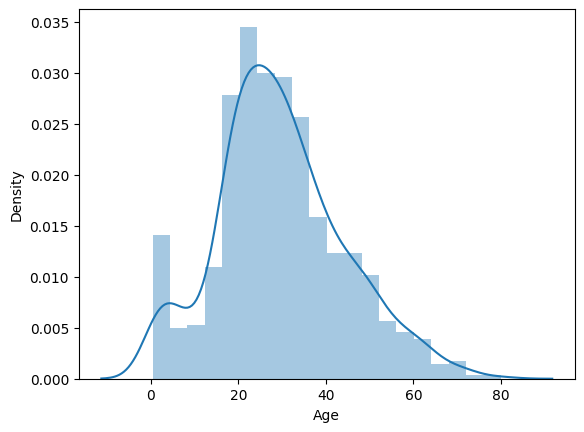

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(train1.Age)
plt.show()

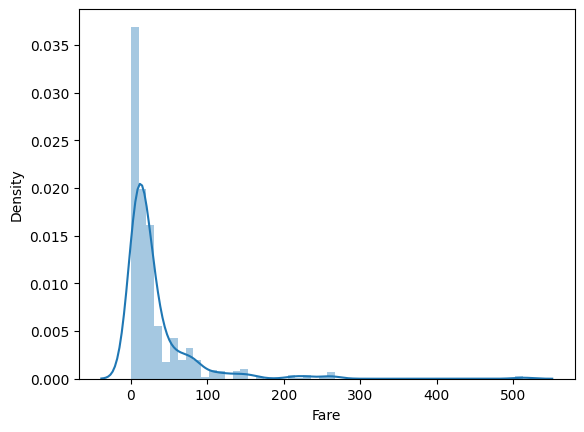

In [ ]:
sns.distplot(train1.Fare)
plt.show()

In [ ]:
train2=train1.copy()
test2=test1.copy()

train2.Embarked.fillna('S',inplace=True)
train2.Age.fillna(train2.Age.median(),inplace=True)

test2.Age.fillna(train2.Age.median(),inplace=True)
test2.Fare.fillna(train2.Fare.mean(),inplace=True)

train2.isna().sum()


,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
test2.isna().sum()

,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


# 3️⃣Duplicated Values

In [ ]:
train2.duplicated().sum()

109

In [ ]:
train2.drop_duplicates(inplace=True)
train2.duplicated().sum()

0

# 📊Exploratory Data Analytics

In [ ]:
train2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


# 1️⃣Distribution of Categorical Features

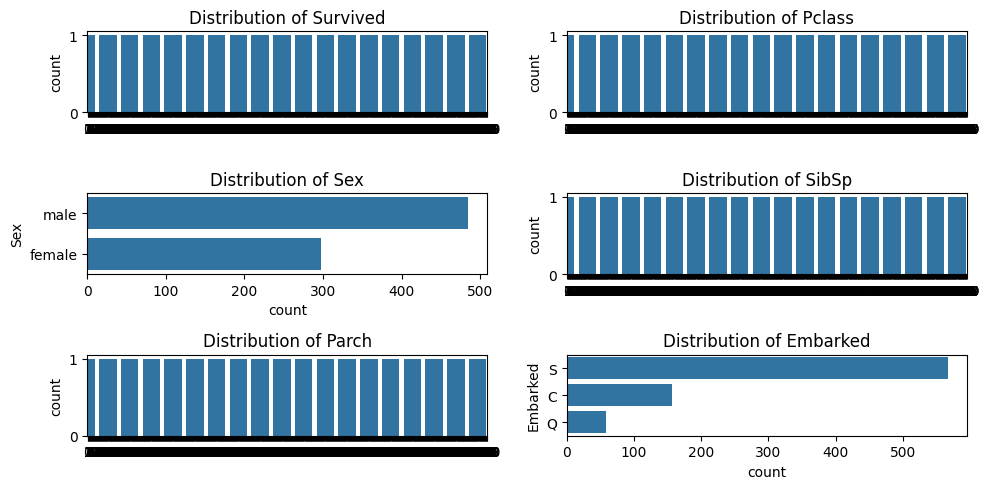

In [ ]:
plt.figure(figsize=(10,5))
n=0
for col in ['Survived','Pclass','Sex','SibSp','Parch','Embarked']:
    n+=1
    plt.subplot(3,2,n)
    sns.countplot(train2[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()

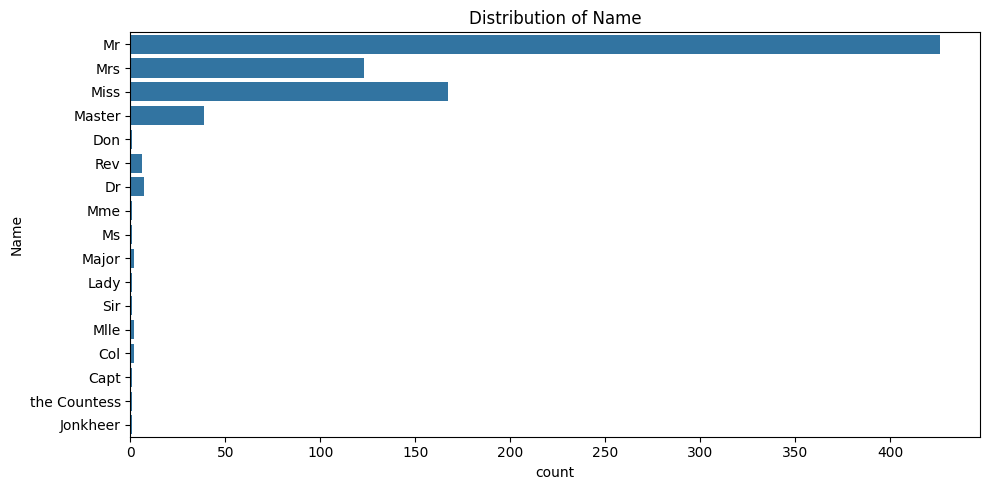

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y=train2.Name)
plt.title('Distribution of Name')
plt.tight_layout()

# 2️⃣Distribution of Numeric Features

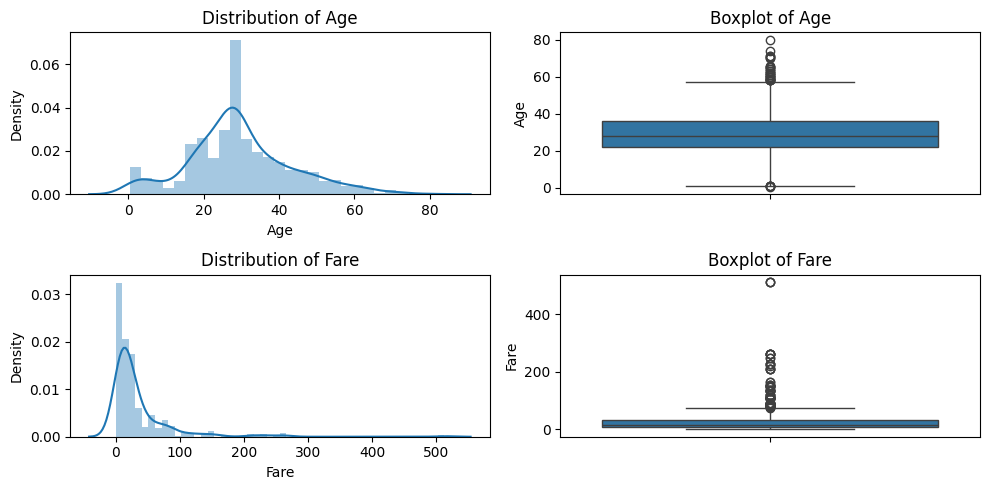

In [ ]:
plt.figure(figsize=(10,5))
n=0
for col in ['Age','Fare']:
    n+=1
    plt.subplot(2,2,n)
    sns.distplot(train2[col])
    plt.title(f'Distribution of {col}')
    n+=1
    plt.subplot(2,2,n)
    sns.boxplot(train2[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()

# 3️⃣Correlation Plot

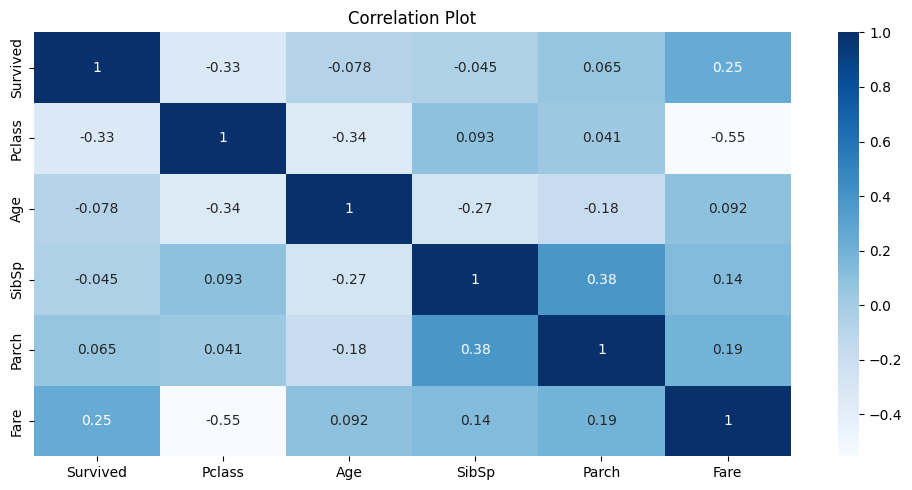

In [ ]:
plt.figure(figsize=(10,5))
cor=train2.drop(columns=['Name','Sex','Embarked'], axis=1).corr()
sns.heatmap(cor,annot=True,cmap='Blues')
plt.title('Correlation Plot')
plt.tight_layout()

# 🕹️Feature Engineering

# 1️⃣One-Hot Encoding

In [ ]:
data=pd.concat([train2,test2],axis=0,ignore_index=True)
data[['Pclass','SibSp','Parch']]=data[['Pclass','SibSp','Parch']].astype(object)
data=pd.get_dummies(data)
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Name_Capt,Name_Col,Name_Don,Name_Dona,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.0,7.2500,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1.0,38.0,71.2833,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1.0,26.0,7.9250,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1.0,35.0,53.1000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0.0,35.0,8.0500,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


# 2️⃣Split the Data

In [ ]:
train=data.iloc[:train2.shape[0],]
test=data.iloc[train2.shape[0]:,1:]

train.shape,test.shape

((782, 44), (418, 43))

In [ ]:
train.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Name_Capt,Name_Col,Name_Don,Name_Dona,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.0,7.2500,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1.0,38.0,71.2833,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1.0,26.0,7.9250,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1.0,35.0,53.1000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0.0,35.0,8.0500,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
test.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Name_Capt,Name_Col,Name_Don,Name_Dona,Name_Dr,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
782,34.5,7.8292,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
783,47.0,7.0000,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
784,62.0,9.6875,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
785,27.0,8.6625,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
786,22.0,12.2875,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


# 6️⃣Normalizing Numeric Values

In [ ]:
train.Age=(train.Age-train.Age.mean())/train.Age.std()
train.Fare=(train.Fare-train.Fare.mean())/train.Fare.std()

test.Age=(test.Age-train.Age.mean())/train.Age.std()
test.Fare=(test.Fare-train.Fare.mean())/train.Fare.std()

round(train.Age.var()),round(train.Fare.var())

(1, 1)

In [ ]:
train.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Name_Capt,Name_Col,Name_Don,Name_Dona,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
0,0.0,-0.552268,-0.527895,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1.0,0.614875,0.698013,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1.0,-0.260482,-0.514972,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1.0,0.396036,0.349896,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0.0,0.396036,-0.512579,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


# 🚀Model Development

# 1️⃣Train-Test Spliting

In [ ]:
from sklearn.model_selection import train_test_split

x=train.drop(columns='Survived')
y=train.Survived

xtrain,xval,ytrain,yval=train_test_split(x,y,test_size=0.2,random_state=50,shuffle=True)

xtrain.shape,ytrain.shape,xval.shape,yval.shape

((625, 43), (625,), (157, 43), (157,))

# 2️⃣Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
lr=model.fit(xtrain,ytrain)

from sklearn.model_selection import cross_val_score
train_score=cross_val_score(lr,xtrain,ytrain,scoring='accuracy',cv=10).mean()
val_score=cross_val_score(lr,xval,yval,scoring='accuracy',cv=10).mean()

print('train score:',train_score,'validation score:',val_score)

train score: 0.7968766001024066 validation score: 0.7641666666666667


# 🎯Submission

In [ ]:
submission=pd.read_csv('/content/drive/MyDrive/titanic_data/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
result=lr.predict(test)
result=result.astype(int)
submission.Survived=result
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
submission.to_csv('/kaggle/working/submission.csv',index=False)

# 🫡Thank you for reading!